In [25]:
import scipy

In [26]:
mat_file = scipy.io.loadmat('../../data/mpii_human_pose_v1_u12_2/mpii_human_pose_v1_u12_1.mat')

In [27]:
mat_file['RELEASE'][0]

array([(array([[(array([[(array(['037454012.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[3.88073395]]), array([[(array([[601]], dtype=uint16), array([[380]], dtype=uint16))]],
                             dtype=[('x', 'O'), ('y', 'O')]))                                                         ]],
                     dtype=[('scale', 'O'), ('objpos', 'O')]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64))                                                      ,
               (array([[(array(['095071431.jpg'], dtype='<U13'),)]], dtype=[('name', 'O')]), array([[(array([[8.07816613]]), array([[(array([[881]], dtype=uint16), array([[394]], dtype=uint16))]],
                             dtype=[('x', 'O'), ('y', 'O')]))                                                         ,
                       (array([[8.90412938]]), array([[(array([[338]], dtype=uint16), array([[210]], dtype=uint8))]],
                             dtype=[('x', 'O'),

In [28]:
anno_list = mat_file['RELEASE'][0]['annolist']

In [30]:
img_train = mat_file['RELEASE'][0]['img_train']

In [31]:
acts = mat_file['RELEASE'][0]['act']

In [32]:
anno_list[0][0]['image'][0][0]['name'][0][0]

'037454012.jpg'

In [33]:
image_names = [anno[0][0]['name'][0] for anno in anno_list[0][0]['image']]

In [34]:
image_names[:10]

['037454012.jpg',
 '095071431.jpg',
 '073199394.jpg',
 '059865848.jpg',
 '015601864.jpg',
 '015599452.jpg',
 '005808361.jpg',
 '086617615.jpg',
 '060111501.jpg',
 '070807258.jpg']

In [35]:
img_train_T = img_train[0].T

In [36]:
acts[0][5]['act_name'][0][0]

'curling'

In [37]:
act_names = [act['act_name'][0][0] if act['act_name'][0].size > 0 else None for act in acts[0]]

In [38]:
len(act_names)

24987

In [39]:
cat_names = [act['cat_name'][0][0] if act['cat_name'][0].size > 0 else None for act in acts[0]]

In [40]:
cat_names

[None,
 None,
 None,
 None,
 'sports',
 'sports',
 'sports',
 'sports',
 'sports',
 'sports',
 'sports',
 None,
 None,
 'inactivity quiet/light',
 'inactivity quiet/light',
 'miscellaneous',
 'miscellaneous',
 'miscellaneous',
 'miscellaneous',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 None,
 None,
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'occupation',
 'water activities',
 None,
 None,
 None,
 'inactivity quiet/light',
 'water activities',
 'water activities',
 'home activities',
 'home activities',
 'home activities',
 'home activities',
 'home activities',
 'home activities',
 'home activities',
 'occupation',
 'home activities',
 'occupation',
 None,
 None,
 None,
 'lawn and garden',
 'lawn and garden',
 'lawn and garden',
 None,
 None,
 None,
 None,
 'lawn and garde

In [41]:
anno_list[0].size

24987

In [42]:
dataset = []
n = anno_list[0].size

for i in range(n):
    dataset.append([image_names[i], act_names[i], cat_names[i], img_train_T[i][0]])

In [43]:
dataset[:10]

[['037454012.jpg', None, None, 0],
 ['095071431.jpg', None, None, 0],
 ['073199394.jpg', None, None, 0],
 ['059865848.jpg', None, None, 0],
 ['015601864.jpg', 'curling', 'sports', 1],
 ['015599452.jpg', 'curling', 'sports', 1],
 ['005808361.jpg', 'curling', 'sports', 1],
 ['086617615.jpg', 'curling', 'sports', 1],
 ['060111501.jpg', 'curling', 'sports', 1],
 ['070807258.jpg', 'curling', 'sports', 1]]

In [44]:
import pandas as pd

dataset_pd = pd.DataFrame(dataset, columns=['image_name', 'activity_name', 'category_name', 'train'])

In [45]:
dataset_pd[dataset_pd["image_name"] == '028705661.jpg']

image_name                      activity_name   category_name  train
24977  028705661.jpg  driving automobile or light truck  transportation      1

In [51]:
def load_dataset(mat_file):
    annotations = mat_file['RELEASE'][0]['annolist']
    acts = mat_file['RELEASE'][0]['act']

    image_file_names = [anno[0][0]['name'][0] for anno in annotations[0][0]['image']]

    img_train = mat_file['RELEASE'][0]['img_train'][0].T

    act_names = [act['act_name'][0][0] if act['act_name'][0].size > 0 else None for act in acts[0]]

    cat_names = [act['cat_name'][0][0] if act['cat_name'][0].size > 0 else None for act in acts[0]]

    person_count = [people[0].size for people in mat_file['RELEASE'][0]['single_person'][0]]

    result = []
    n = annotations[0].size

    for i in range(n):
        result.append([image_file_names[i], act_names[i], cat_names[i], person_count[i], img_train_T[i][0]])

    return result

In [52]:
dataset = pd.DataFrame(load_dataset(mat_file), columns=['name', 'activity', 'category', 'person_count', 'if_train_set'])

In [53]:
len(dataset)

24987

In [64]:
dataset[dataset['person_count'] == 1]['category'].value_counts()

sports                    2021
occupation                1740
conditioning exercise     1266
home activities           1091
home repair                948
lawn and garden            915
water activities           799
fishing and hunting        555
winter activities          537
miscellaneous              451
bicycling                  390
music playing              358
walking                    357
dancing                    261
running                    178
inactivity quiet/light     114
self care                   80
religious activities        72
transportation              64
volunteer activities        14
Name: category, dtype: int64

In [56]:
dataset['category'].value_counts()

sports                    3593
occupation                2412
conditioning exercise     1755
home activities           1416
lawn and garden           1130
home repair               1090
water activities          1066
winter activities          778
miscellaneous              755
fishing and hunting        725
dancing                    722
walking                    608
music playing              583
bicycling                  533
running                    316
inactivity quiet/light     189
religious activities       124
transportation              93
self care                   90
volunteer activities        55
Name: category, dtype: int64

In [73]:
filtered_dataset = dataset[dataset.category.isin(['conditioning exercise', 'home activities', 'lawn and garden', 'home repair',
                                                   'water activities', 'winter activities'])]
filtered_dataset = filtered_dataset[filtered_dataset['person_count'] == 1]

In [74]:
filtered_dataset

name                                           activity  \
48     054671028.jpg                             swimming, synchronized   
49     018485446.jpg                                   scrubbing floors   
50     096958463.jpg                    mopping, standing, light effort   
51     077513282.jpg                    mopping, standing, light effort   
52     093949894.jpg                    mopping, standing, light effort   
...              ...                                                ...   
24806  089400541.jpg  sledding, tobogganing, bobsledding, luge (Tayl...   
24807  005594795.jpg  sledding, tobogganing, bobsledding, luge (Tayl...   
24818  010278558.jpg  sledding, tobogganing, bobsledding, luge (Tayl...   
24820  030183130.jpg  sledding, tobogganing, bobsledding, luge (Tayl...   
24821  066080794.jpg  sledding, tobogganing, bobsledding, luge (Tayl...   

                category  person_count  if_train_set  
48      water activities             1             1  
49       home activities             1             1  
50       home activities             1             1  
51       home activities             1             1  
52       home activities             1             1  
...                  ...           ...           ...  
24806  winter activities             1             1  
24807  winter activities             1             1  
24818  winter activities             1             1  
24820  winter activities             1             1  
24821  winter activities             1             1  

[5556 rows x 5 columns]

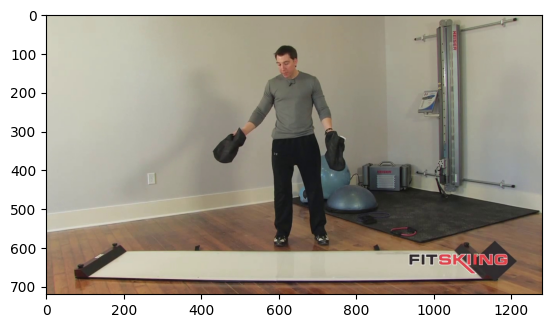

In [266]:
import matplotlib.pyplot as plt
import cv2

PATH = 'E:/images/'

img = cv2.imread(PATH + '086968658.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

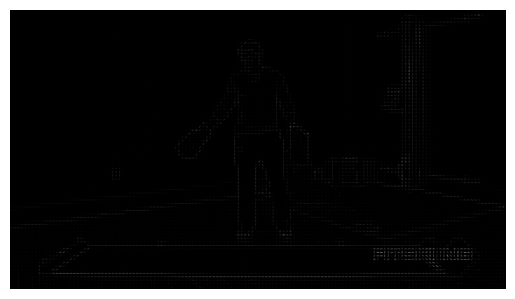

In [267]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import skimage
import matplotlib.pyplot as plt

fd, hog_image = hog(img, orientations=9, pixels_per_cell=(9, 9),
                	cells_per_block=(24, 24), visualize=True, channel_axis=-1) #channel_axis = -1 if RGB, else None
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

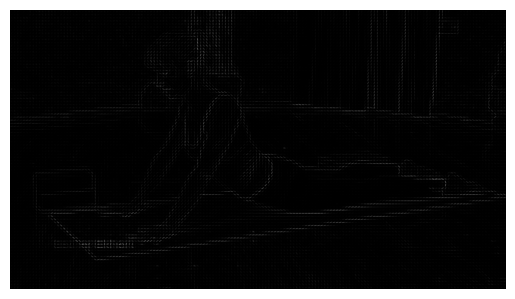

In [213]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, channel_axis=-1) #channel_axis = -1 if RGB, else None
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

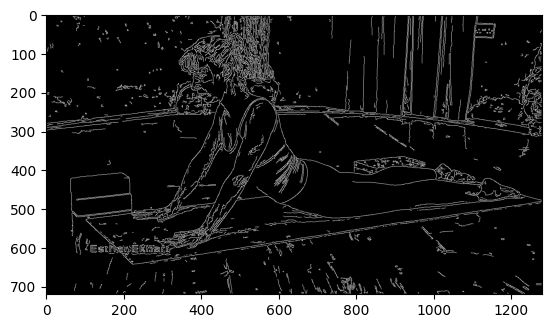

In [214]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
new_img = skimage.feature.canny((gray_img), sigma=0.5)

plt.imshow(new_img, cmap="gray")
plt.show()

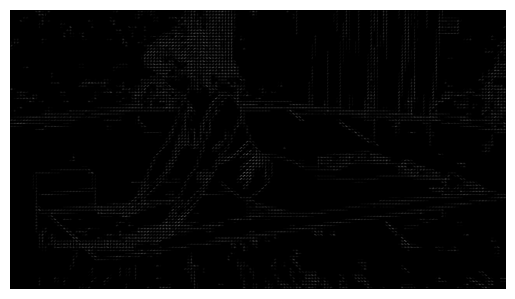

In [242]:
fd, hog_image = hog(new_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True) #channel_axis = -1 if RGB, else None
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()

In [243]:
fd

array([0., 0., 0., ..., 0., 0., 0.])

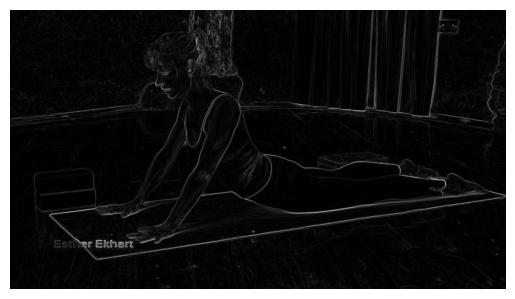

In [216]:
sobel_img = skimage.filters.sobel(gray_img)
plt.axis("off")
plt.imshow(sobel_img, cmap="gray")
plt.show()

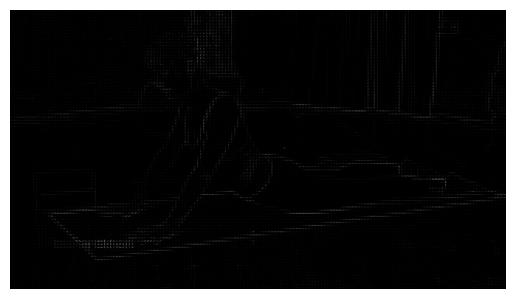

In [217]:
fd, sobel_img = hog(sobel_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True) #channel_axis = -1 if RGB, else None
plt.axis("off")
plt.imshow(sobel_img, cmap="gray")
plt.show()

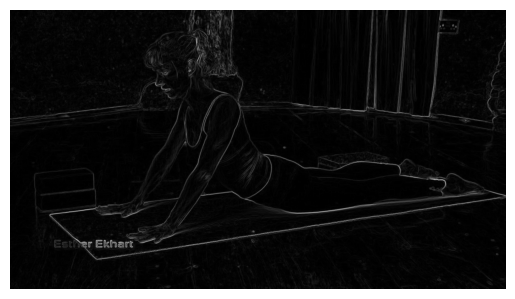

In [218]:
scharr_img = skimage.filters.scharr(gray_img)
plt.axis("off")
plt.imshow(scharr_img, cmap="gray")
plt.show()

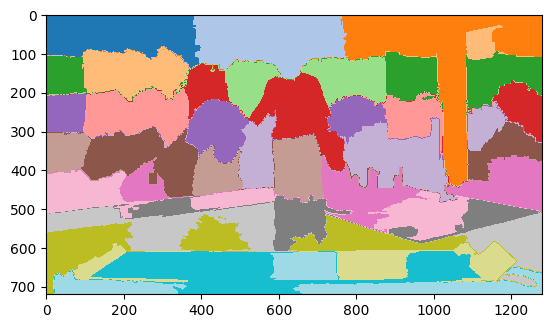

In [272]:
from skimage.segmentation import felzenszwalb, slic

segments_fz = slic(img, compactness=5, sigma=0.01,
                     start_label=1)
plt.imshow(segments_fz, cmap='tab20')
plt.show()

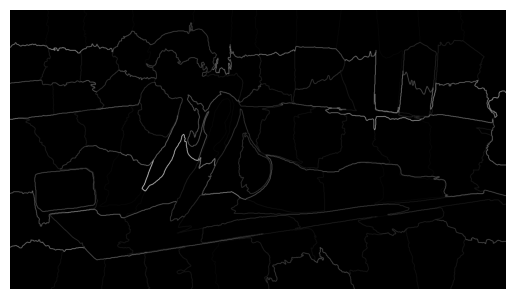

In [226]:
scharr_img = skimage.filters.scharr(segments_fz)
plt.axis("off")
plt.imshow(scharr_img, cmap="gray")
plt.show()

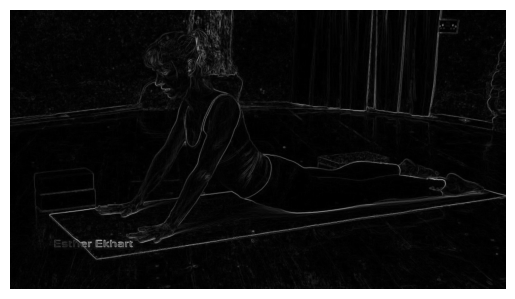

In [221]:
roberts_img = skimage.filters.roberts(gray_img)
plt.axis("off")
plt.imshow(roberts_img, cmap="gray")
plt.show()

C:\Users\cubix\AppData\Local\Programs\Python\Python310\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


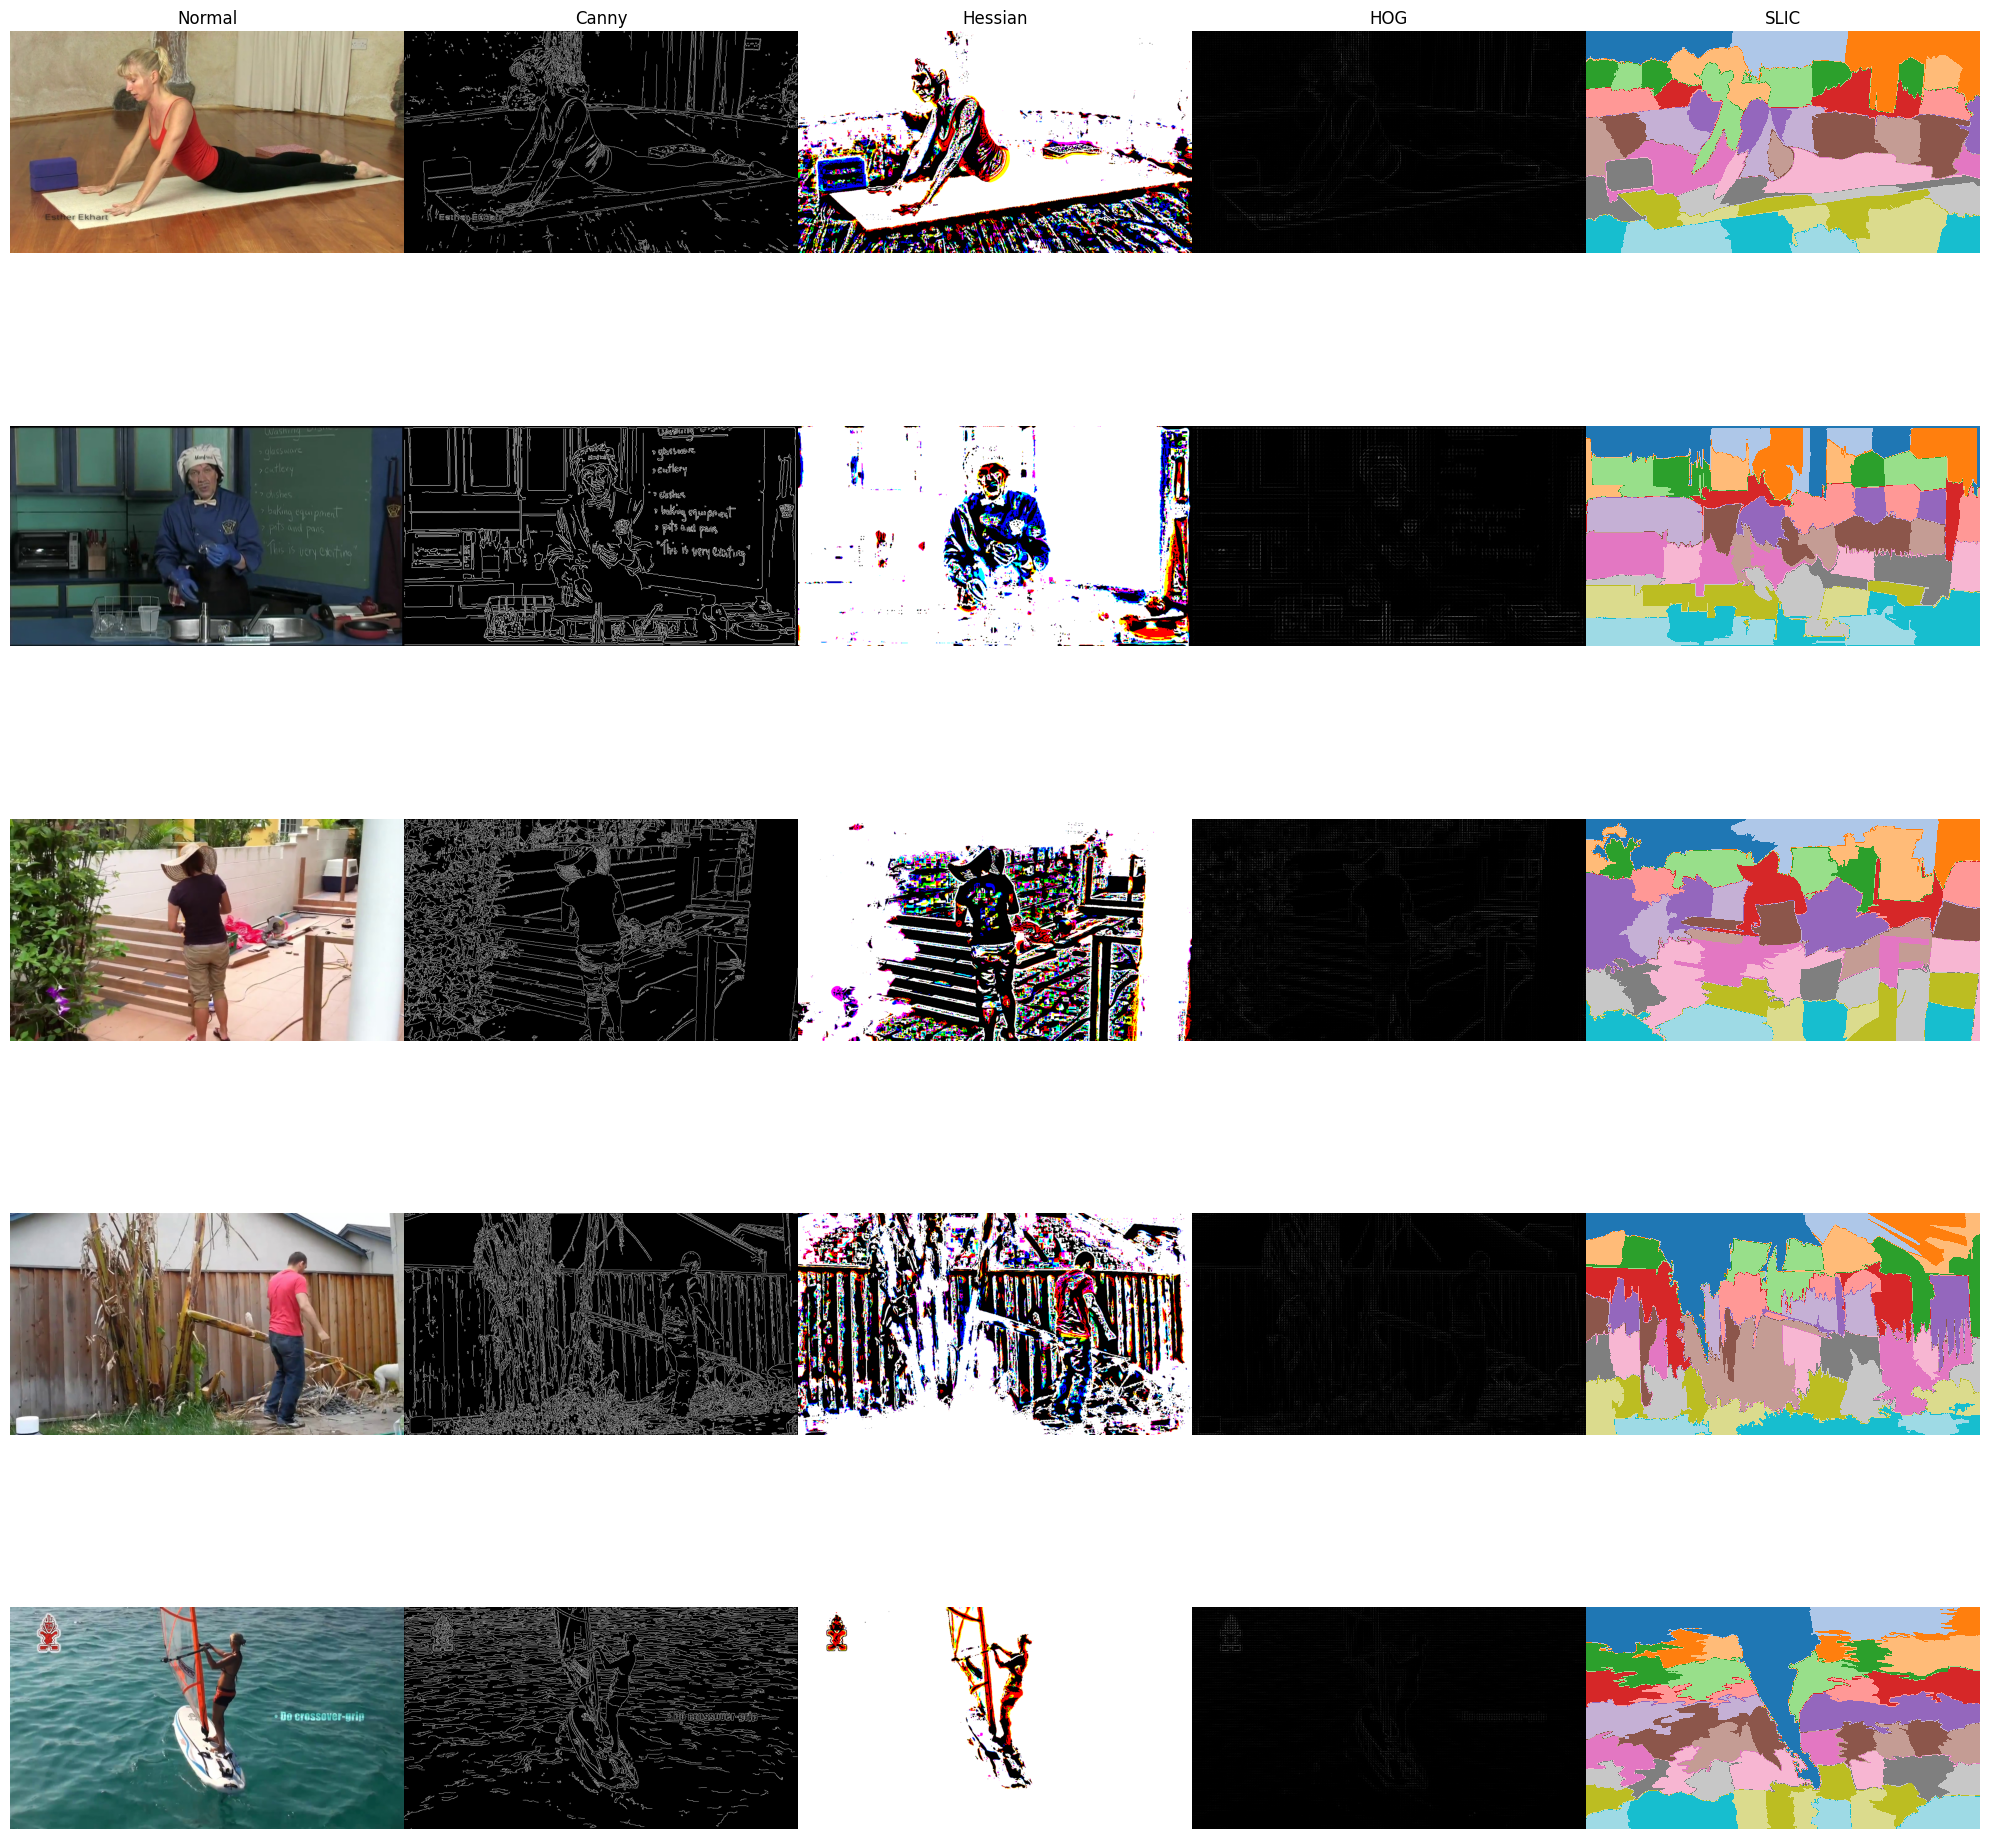

In [275]:
figs, axs = plt.subplots(5, 5, figsize=(20,20))
img_names = ['047425502.jpg', '071395263.jpg', '005717965.jpg', '002581191.jpg', '098907398.jpg']
img_categories = ['conditioning exercise', 'home activities', 'lawn and garden', 'home repair', 'water activities']
filter_names = ['Normal', 'Canny', 'Hessian', 'HOG', 'SLIC']

for idx in range(len(img_names)):

    img = cv2.imread(PATH + img_names[idx], cv2.IMREAD_COLOR)
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    canny_img = skimage.feature.canny(gray_img, sigma=0.5)
    hessian_img = skimage.filters.hessian(img)
    fd, hog_image = skimage.feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, channel_axis=-1) #channel_axis = -1 if RGB, else None
    slic_img = skimage.segmentation.slic(img)

    if not idx:
        for jdx in range(len(filter_names)):
            axs[idx, jdx].title.set_text(filter_names[jdx])

    axs[idx, 0].set_ylabel(img_categories[idx], rotation=90, size='large')


    axs[idx, 0].imshow(img)
    axs[idx, 1].imshow(canny_img, cmap="gray")
    axs[idx, 2].imshow(hessian_img, cmap='gray')
    axs[idx, 3].imshow(hog_image, cmap="gray")
    axs[idx, 4].imshow(slic_img, cmap='tab20')

    axs[idx, 0].axis("off")
    axs[idx, 1].axis("off")
    axs[idx, 2].axis("off")
    axs[idx, 3].axis("off")
    axs[idx, 4].axis("off")

figs.tight_layout()
figs.subplots_adjust(wspace=0, hspace=0)

# plt.show()

In [276]:
figs.savefig('img.png')

1. normal
2. canny
3. hessian matrix
4. hog
5. slic
6.